# Start

In [1]:
import os
import sys

import torch
from tensorboardcolab import TensorBoardColab

if (torch.cuda.is_available()):
    dir_main = os.path.abspath('../../../repo1/')
    sys.path.append(dir_main)
    print (' - In Path : ', sys.path[-1])

    USE_GPU = torch.cuda.is_available()
    print (' - USE_GPU : ', USE_GPU)

    !nvidia-smi
else:
    print (' - GPU Issues!')

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


 - In Path :  /home/strider/Work/Netherlands/TUDelft/1_Courses/Sem2/DeepLearning/Project/repo1
 - USE_GPU :  True
Tue Jun 11 09:24:29 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.90                 Driver Version: 384.90                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce 940MX       Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P0    N/A /  N/A |    455MiB /  2002MiB |      4%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------

# Validate

In [ ]:
torch.cuda.empty_cache()
from src.predict import *
from src.nets import *

if (1):
    DIR_PROJ         = os.path.abspath('../../../repo1/')

if (1):
    MODEL            = ''
    MODEL_CFGFILE    = os.path.join(DIR_PROJ, 'data/cfg/github_pjreddie/yolov2-voc.cfg')
    
    MODEL_WEIGHTFILE = os.path.join(DIR_PROJ, 'data/weights/yolov2-voc.weights') #['0.5' : 0.6366, '0.25' : 0.7, '0.1' : 0.7363]
    EVAL_PREFIX      = 'iter1_pretrained_'
    
    # MODEL_WEIGHTFILE = os.path.join(DIR_PROJ, 'data/weights/pruned/yolov2-voc-weight-prune-10.0.weights') #['0.5' : 0.6323, '0.25' : 0.7]
    # EVAL_PREFIX      = 'iter1_pretrained_10_'
    
    # MODEL_WEIGHTFILE = os.path.join(DIR_PROJ, 'data/weights/pruned/yolov2-voc-weight-prune-30.0.weights') #['0.5' : 0.6323, '0.25' : 0.69, ]
    # EVAL_PREFIX      = 'iter1_pretrained_30_'
    
    # MODEL_WEIGHTFILE = os.path.join(DIR_PROJ, 'data/weights/pruned/yolov2-voc-weight-prune-50.0.weights') #['0.25' :  0.6874]
    # EVAL_PREFIX      = 'iter1_pretrained_50_'
    
    # MODEL_WEIGHTFILE = os.path.join(DIR_PROJ, 'data/weights/pruned/yolov2-voc-weight-prune-70.0.weights') #['0.25' :  0.5160]
    # EVAL_PREFIX      = 'iter1_pretrained_70_'
    
    # MODEL_WEIGHTFILE = os.path.join(DIR_PROJ, 'data/weights/pruned/yolov2-voc-weight-prune-90.0.weights') #['0.25' :  0, '0.1' : 0, '0.005' : 0]
    # EVAL_PREFIX      = 'iter1_pretrained_90_'
    
    MODEL_LOSS       = RegionLoss()
    
    PASCAL_DIR       = os.path.join(DIR_PROJ, 'data/dataset/VOCdevkit/')
    EVAL_IMAGELIST   = os.path.join(DIR_PROJ, 'data/dataset/VOCdevkit/2007_test.txt')
    EVAL_OUTPUTDIR   = os.path.join(DIR_PROJ, 'eval_data')
    EVAL_OUTPUTDIR_PKL = os.path.join(DIR_PROJ, 'eval_results')
    
    
    # EVAL_PREFIX      = 'iter1_weighspruned_70_'
    
    print (' - 0. MODEL       : ', MODEL)
    print (' - 0. MODEL_WEIGHT: ', MODEL_WEIGHTFILE)
    print (' - 0. EVAL_PREFIX : ', EVAL_PREFIX)
   
if (1):
    BATCH_SIZE = 32
    CONF_THRESH = 0.05 # [0.5, 0.25, 0.1, 0.005]
    print (' - 0. BATCH_SIZE  : ', BATCH_SIZE)
    print (' - 0. CONF_THRESH : ', CONF_THRESH)
    
if (1):
    try:
        print (' - 0. Logger      : ', LOGGER)
    except:
        LOGGER = TensorBoardColab()
        print (' - 0. Logger      : ', LOGGER)    
    
    print ('')


valObj = PASCALVOCEval(MODEL, MODEL_CFGFILE, MODEL_WEIGHTFILE, MODEL_LOSS 
                       ,PASCAL_DIR, EVAL_IMAGELIST, EVAL_OUTPUTDIR, EVAL_PREFIX, EVAL_OUTPUTDIR_PKL
                       , LOGGER)
valObj.predict(BATCH_SIZE=BATCH_SIZE, CONF_THRESH=CONF_THRESH)
# valObj._do_python_eval()

# ! ls -l /content/CS4180-DL/eval_data/iter1_pretrained_90_*

# Train

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


 - 0. DIR_MAIN     :   /home/strider/Work/Netherlands/TUDelft/1_Courses/Sem2/DeepLearning/Project/repo1
 - 0. MODEL_WEIGHT :   /home/strider/Work/Netherlands/TUDelft/1_Courses/Sem2/DeepLearning/Project/repo1/data/weights/github_pjreddie/yolov2-voc.weights
 - 0. VAL_PREFIX   :  pretrained_
 - 0. BATCH_SIZE    :  32
 - 0. DEBUG_EPOCHS :  -1
 - 0. MAX_EPOCHS   :  100
 - 0. Logger       :  



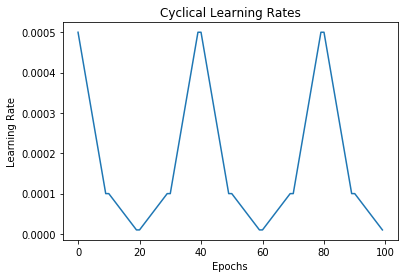

  -- [DEBUG] Non-BN Block :  {'pad': '1', 'type': 'convolutional', 'activation': 'linear', 'filters': '125', 'stride': '1', 'size': '1', 'batch_normalize': 0}
  -- [DEBUG][Darknet] self.anchors :  [1.3221, 1.73145, 3.19275, 4.00944, 5.05587, 8.09892, 9.47112, 4.84053, 11.2364, 10.0071]
  -- [DEBUG][Darknet] self.num_anchors :  5
  -- [DEBUG][Darknet] self.anchor_step :  2.0
  -- [DEBUG][Darknet] self.num_classes :  20
  -- [DEBUG][Darknet] self.loss :  RegionLoss()

 -- init_epoch :  0
 -- max_epochs :  100
 ---------------------------- EPOCH :  0  (LR :  0.0005 ) ---------------------------------- 


  - [INFO] data (or X) :  torch.Size([32, 3, 416, 416])  || type :  torch.float32
  - [INFO] target (or Y) :  torch.Size([32, 250])  || type :  torch.float32
  - [INFO] Total train points :  518  || nsamples :  16551


Traceback (most recent call last):
  File "/home/strider/Work/Netherlands/TUDelft/1_Courses/Sem2/DeepLearning/Project/repo1/src/train.py", line 223, in train
    output           = self.model(data)
  File "/home/strider/anaconda3/lib/python3.5/site-packages/torch/nn/modules/module.py", line 489, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/strider/Work/Netherlands/TUDelft/1_Courses/Sem2/DeepLearning/Project/repo1/src/nets.py", line 743, in forward
    x = self.models[ind](x)
  File "/home/strider/anaconda3/lib/python3.5/site-packages/torch/nn/modules/module.py", line 489, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/strider/anaconda3/lib/python3.5/site-packages/torch/nn/modules/container.py", line 92, in forward
    input = module(input)
  File "/home/strider/anaconda3/lib/python3.5/site-packages/torch/nn/modules/module.py", line 489, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/strider/anaconda3/lib/python3.5/s

> /home/strider/Work/Netherlands/TUDelft/1_Courses/Sem2/DeepLearning/Project/repo1/src/train.py(197)train()
-> for batch_idx, (data, target) in enumerate(train_loader):
(Pdb) q



BdbQuit: 

In [24]:
%reset
import os
import sys

import torch
from tensorboardcolab import TensorBoardColab

torch.cuda.empty_cache()

if (torch.cuda.is_available()):
    
    if (1):
        DIR_MAIN         = os.path.abspath('../../../repo1/')
        sys.path.append(DIR_MAIN)
        print (' - 0. DIR_MAIN     :  ', DIR_MAIN)
        from src.train import YOLOv2Train
        
    if (1):
        PASCAL_DIR   = os.path.join(DIR_MAIN, 'data/dataset/VOCdevkit/')
        PASCAL_TRAIN = os.path.join(DIR_MAIN, 'data/dataset/VOCdevkit/voc_train.txt')
        PASCAL_VALID = os.path.join(DIR_MAIN, 'data/dataset/VOCdevkit/2007_test.txt')
        TRAIN_LOGDIR = os.path.join(DIR_MAIN, 'train_data')
        VAL_LOGDIR   = os.path.join(DIR_MAIN, 'eval_data')
        VAL_OUTPUTDIR_PKL = os.path.join(DIR_MAIN, 'eval_results')
        MODEL_CFG    = os.path.join(DIR_MAIN, 'data/cfg/github_pjreddie/yolov2-voc.cfg')
        
    if (1):
        # MODEL_WEIGHT = os.path.join(DIR_MAIN, 'data/weights/pruned/yolov2-voc-weight-prune-30.0.weights')
        # VAL_PREFIX   = 'pretrained-30_'
        
        MODEL_WEIGHT = os.path.join(DIR_MAIN, 'data/weights/github_pjreddie/yolov2-voc.weights')
        VAL_PREFIX   = 'pretrained_'
        
        print (' - 0. MODEL_WEIGHT :  ', MODEL_WEIGHT)
        print (' - 0. VAL_PREFIX   : ', VAL_PREFIX)
        
    if (1):
        BATCH_SIZE    = 32;
        print (' - 0. BATCH_SIZE    : ', BATCH_SIZE)
        
    if (1):
        DEBUG_EPOCHS = -1 #[-1, 50]
        MAX_EPOCHS   = 100
        
        print (' - 0. DEBUG_EPOCHS : ', DEBUG_EPOCHS)
        print (' - 0. MAX_EPOCHS   : ', MAX_EPOCHS)

    if (0):
        LEARNING_RATE = 0.0001 
        print (' - 0. LEARNING_RATE : ', LEARNING_RATE)
        LEARNING_RATES = [LEARNING_RATE for _ in range(MAX_EPOCHS)]
    else:
        import numpy as np
        a = np.linspace(0.0005,0.0001, 10)
        b = np.linspace(0.0001, 0.00001, 10)
        c = np.linspace(0.00001, 0.0001, 10)
        d = np.linspace(0.0001, 0.0005,10) 
        LEARNING_RATES = np.hstack((a,b,c,d,a,b,c,d,a,b))

        import matplotlib.pyplot as plt
        plt.plot(LEARNING_RATES)
        plt.title('Cyclical Learning Rates')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.show()
    
    assert len(LEARNING_RATES) == MAX_EPOCHS
    
    if (1):
        try:
            LOGGER = ''
            print (' - 0. Logger       : ', LOGGER)
        except:
            LOGGER = TensorBoardColab()
            print (' - 0. Logger       : ', LOGGER)
        print ('')
    

    if (1):
        trainObj = YOLOv2Train()
        trainObj.train(PASCAL_DIR, PASCAL_TRAIN, PASCAL_VALID, TRAIN_LOGDIR, VAL_LOGDIR, VAL_OUTPUTDIR_PKL, VAL_PREFIX
                       , MODEL_CFG, MODEL_WEIGHT
                       , BATCH_SIZE, LEARNING_RATES, MAX_EPOCHS
                       , LOGGER, DEBUG_EPOCHS=DEBUG_EPOCHS, verbose=0)
else:
    print (' - GPU Issues!!')

# Tmp